<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science
</div>

# Lab 2: Exploratory Data Analysis

In this lab we will cover Exploratory Data Analysis (EDA).

[Section A](#section_a) primarily focuses on *categorical* variables, whereas [Section B](#section_b) focuses more on *numerical* variables.

<a id="section_a"></a>
## Section A: Categorical Variables

>#### Table of Contents
>
>- [Introduction](#a_intro)
>    - Data types
>    - Dataset
>- [Data Preprocessing](#a_preprocess)
>    - Investigating missing data
>        - Dropping a column
>        - Imputing missing values
>        - Dropping rows
>    - Categorical encoding
>        - Ordinal encoding
>        - One-hot encoding
>- [Exploratory analysis](#a_eda)
>    - Univariate analysis
>    - Bi-variate analysis

<a id="a_intro"></a>
## 1 Introduction

### 1.1 Data types

We begin by looking at the data types. One common way to think about data is to classify data into *categorical* and *numerical* variables.  
- **Categorical** variables: Examples are exam grade and gender.  If there is an ordering for the variables, it is called *ordinal* (e.g. exam grade, where A > B > C > ...).  It can also be *nominal* (e.g. gender, where there is no ordering). In short, they describe different categories (hence the name).
- **Numerical** variables: Examples are height of a person and rating of a product. They are quantitative and can be measured on a scale and take the form of a number directly (as the name suggests). 


What are their relationships to _discrete_ or _continuous_ random variable? On the one hand, categorical variables are always discrete. While in the lecture we mentioned that all random variables take numbers as their values, they can still be used to model categorical data. One example is the outcome of flipping a coin is categorical (head or tail), but we can let head = 0 and tail = 1. Other examples include letting A = 4, B = 3, C = 2 for exam grades, or male = 0 and female = 1 for genders. On the other hand, numerical data can be either discrete or continuous: product rating on Amazon and number of successes in binomial trials are discrete, and height of a person is continuous. Their relationships are summarized in the following table.

| Data Types | <p align="left">Discrete   | <p align="left">Continuous |
| ---- | ---- | ---- |
| **Categorical**  |<p align="left"> ✓ (grade, gender) | <p align="left">✗     |
| **Numerical** |<p align="left"> ✓ (rating, # successes) | <p align="left">✓ (height, temperature) |



### 1.2 Dataset

A dataset is a collection of typically related data. Throughout this lab we will touch on various concepts but anchor on a single dataset, the "titanic" dataset.  Please download the file `titanic.csv` and place it in the same directory as this Jupyter Notebook. 

Before diving into the analysis proper, it is useful to have some contextual background.  RMS Titanic was a passenger liner which sank in the North Atlantic Sea in 1912.  At the time she went into service, Titanic was the largest ship afloat.  Despite having advanced safety features, more than 1500 passengers died in the tragedy, making it one of the deadliest peacetime marine disasters in modern history.

Now open `titanic.csv` and visually examine its content.  You will see that the data is neatly organised into several columns with many rows of data.  Each row is an obversation and represents a passenger, and along each row, you find values that describe certain attributes about the passenger.  For example, you see the name, sex, cabin-class, etc.  Of particular interest is the variable `Survived` which indicates if the given passenger survived or not. 

Throughout the labs for this course and for the project, you will use Python to programmatically examine, manipulate and analyze datasets. Let's first import the rather standard libraries as follow. In addition to `NumPy` and `pandas`, we will use `matplotlib` for charting. The most commonly used module within `matplotlib` is the `pyplot` module, that is the reason why most people would simply create an alias for the `pyplot` module only.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Our dataset is in` csv` format, hence we can use the `read_csv` method in `pandas` to load the data into a `DataFrame`

In [2]:
df = pd.read_csv('titanic.csv')

First, to develop a sense of its size, use `shape` attribute for the `DataFrame`.  Here we see that the "titanic" dataset has 891 rows and 12 columns, which is in fact a very small dataset by modern standards. 

In [3]:
n_rows, n_cols = df.shape
print(f"# of rows is {n_rows}")
print(f"# of columns is {n_cols}")

# of rows is 891
# of columns is 12


Next, to gain a big picture of the dataset, we could peek into the first few rows of the `DataFrame` using the `head` method.  

In [4]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,Third,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,First,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,Third,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,Third,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,Second,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


Or we could do a quick sampling using the `sample` method

In [5]:
df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
562,563,Second,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S,0
873,874,Third,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,0
679,680,First,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
84,85,Second,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
367,368,Third,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,1


This is an example of _structured data_, highly organized with rows and columns.  It is a very commonly used format.  Sometimes it's also referred to _tabular_ data, as it easily interfaces with any relational database systems.  Contrast that to _unstructured data_, such as images and text, which are less convenient to work with.

Now lets take a closer look at each column.  We have 12 columns, plus one index column auto-generated by `pandas`.  For the first 11 columns, each repreresents a particular **independent variable** or sometimes referred to as _features,  attributes, or predictor_.  These terms are often used interchangeably by data science practitioners.

The last column `Survived` is our **dependent variable**, or sometimes referred to as _response variable_.  In other words, we hypothesise that value of `Survived` is a function which depends on the first 11 independent variables.  Hence, in any data science project, one of the key objectives is to build a model to understand the relationship between the dependent variable and the independent variables. 

-----
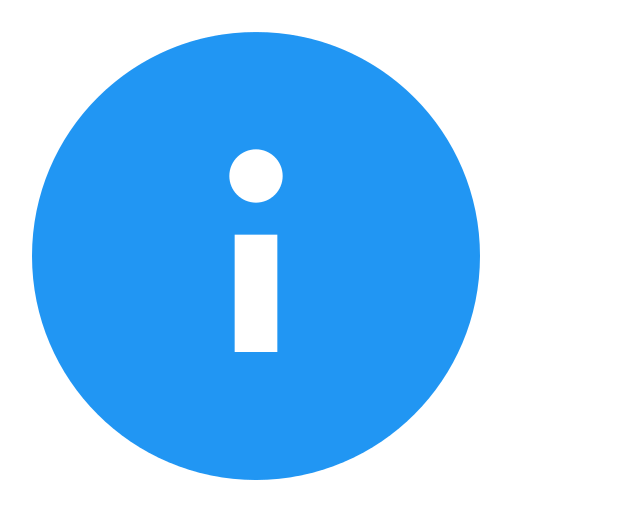In many practical cases, the dependent variable is not given explicitly (it is not always the last column!) and you will need to identify it. Typically the dependent variable is related to the business objective, and can help make business decisions. In the "titanic" dataset, the variable `Survived` can help us establish future emergency protocols onboard ships, or improve the safety features of ships.

-----

After getting a big picture of the dataset, let's seek to understand the data type for each column.  A quick way is to use the `dtypes` attributes

In [6]:
print(df.dtypes)

PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object


However it is useful, `dtypes` alone will not give you a full picture.  In a professional setting, the dataset owner must have a document called **data dictionary** which gives precise definition of each of the columns.  Below we illustrate an example of the data dictionary for our "titanic" dataset.

|Column name|Explanation|Data type|
|---|---|---|
|PassengerId| Unique Id of a passenger | integer |
|Pclass| Ticket class | string (First, Second, Third) |
|Name| Name of the passenger | string |
|Sex| Sex of the passenger | string (male, female) |
|Age| Age in years | float |
|SibSp| # of siblings / spouses aboard the Titanic | integer |
|Parch| # of parents / children aboard the Titanic | integer |
|Ticket| Ticket number | string |
|Fare| Passenger fare | float |
|Cabin| Cabin number | string | 
|Embarked| Port of Embarkation | char |
|Survival| Whether a passenger survived or not, 1 for survived, 0 for not | integer (1,0)|

-----
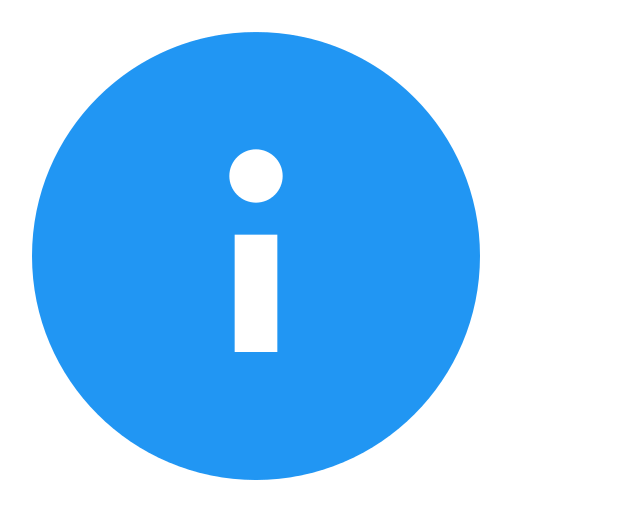 Here we have the categorical variables `Pclass`, `Sex`, `Embarked`, `Survival`.  Although `Survival` appears to be a number, it is categorical in nature since the number is merely a representation of whether a passenger survives or not.  The point here is that a categorical variable does not necessarily need to be an object or string. 

-----

<a id="a_preprocess"></a>
## 2 Data Preprocessing

Before getting into any analysis or modeling, we need to ensure that our data is clean and ready.  This includes tasks like dealing with missing data, or dealing with outliers. Here lets take a look at how to deal with missing data, which is one of the most common issues in a real world data.  Outlier detection is a more advanced technique outside the scope of this course.

### 2.1 Investigating missing data

As a first step, lets use `count`.

In [7]:
df.count()

PassengerId    891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Survived       891
dtype: int64

What `count` does is to count the number of elements which is not `NaN` for each column.  We don't seem to have a big issue here as most of the columns are complete.  To justify, it is worthwhile to look at percentages rather than absolute number.  We can achieve this by simply dividing by `n_rows`

In [8]:
df.count() / n_rows 

PassengerId    1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.801347
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       0.997755
Survived       1.000000
dtype: float64

To deal with missing data, we could do one or more of the following:
- **drop** the column or variable with many missing values.
- **drop** the row or observation with one or more missing values.
- **impute** the missing value.  This means replacing the missing value with an appropriate value, such as the mean or mode.

#### 2.1.1 Dropping a column

In our case, more than 80% of the `Cabin` column is missing.  Unless we have specific domain knowledge or insight, it is not quite possible to fill these gaps.  A practical approach would be to drop that column.

In [9]:
df.drop(columns=["Cabin"], inplace=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


We have just dropped the column *in-place*.  This means that `df` itself has been modified to exclude the column `Cabin`

#### 2.1.2 Imputing a column

However, there are still two other columns `Age` and `Embarked` which consist of some empty fields.  For the `Age` field, there is no reasonably sound approach (at least in this context) to impute the missing data.  

For the `Embarked` field, one approach would be to impute using mode (i.e., the most frequent value).  In other words, we are assuming that, for passengers with missing port of embarkation, they had embarked on the most common port of embarkation.  Furthermore, when we do a count on the unique values of the `Embarked`, it is also clear that value `S` is the clear majority.

In [10]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,Third,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0
6,7,First,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0
7,8,Third,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,9,Third,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,1
9,10,Second,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1


In [11]:
embarked_mode = df.Embarked.mode()[0]  # note that .mode() returns a series so we need to access the first element using [0]
df.Embarked.value_counts()  # do a count to verify the mode

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Now we are ready to fill in the missing values using the computed mode.

In [12]:
df.Embarked.fillna(embarked_mode, inplace=True)
df.count()

PassengerId    891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
Survived       891
dtype: int64

#### 2.1.3 Dropping rows

Finally, since there is no good way to impute `Age`, and also given that the missing percentage is not too high, we opt to drop any rows with missing `Age`.  Hence note that the number of rows has been reduced after dropping rows.

In [13]:
df.dropna(inplace=True)
df.count()

PassengerId    714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Embarked       714
Survived       714
dtype: int64

### 2.2 Categorical Encoding

As we have seen, some categorical variables are represented as strings. This poses a practical problem as many of the modeling packages only run on numerical variables. Hence, there is a need to transform or _encode_ categorical variables to some numbers in a meaningful way, ensuring that their representations are not lost. 

For nominal variables with more than two values, a common way is to apply _one-hot encoding_. If a variable only takes two different values, we simply perform _binary encoding_. For ordinal variables, we could apply _ordinal encoding_.

#### 2.2.1 One-Hot Encoding

Nominal variables have no intrinsic order. The typical way to deal with them is to apply one-hot encoding. Based on each of the unique values that the nominal variable can take, we create new variables. These are called dummy variables, and they take either 0 or 1. 

For example, `Embarked` which represents Port of Embarkation is a nominal variable which can only take one of the three unique values 'S','C', or 'Q'.  When we perform one-hot encoding, we would create three additional variables, namely `S`, `C` and `Q`. Now, for a given row, if the `Embarked` column takes the value `C`, then the newly created variable `C` would be 1 and the other two variables `S` and `Q` would be 0.

Both `sklearn` and `pandas` can be used to do one-hot encoding. In particular, `pandas` provides a slightly more convenient way to do this via the `get_dummies` method

In [14]:
dummy = pd.get_dummies(df["Embarked"])
df = pd.concat([df,dummy], axis=1)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,C,Q,S
0,1,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0,1
1,2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,0,0
2,3,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1
4,5,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,Third,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,0,1,0
886,887,Second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0,0,1
887,888,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0,0,1
889,890,First,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1,0,0


#### 2.2.2 Binary & Ordinal Encoding

For binary categorical variables (i.e., taking only two distinct values), such as the `Sex` variable that can only be 'male' or 'female', we can perform a binary encoding. We simply call `.map` and pass a dictionary indicating what value 'male' and 'female' should map to. Typically, we map the two values of a binary variable to 0 and 1.

In [15]:
encoding = {"male":0, "female":1}
df["Sex_Encoded"] = df["Sex"].map(encoding)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,C,Q,S,Sex_Encoded
0,1,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0,1,0
1,2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,0,0,1
2,3,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1,1
3,4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1,1
4,5,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,Third,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,0,1,0,1
886,887,Second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0,0,1,0
887,888,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0,0,1,1
889,890,First,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1,0,0,0


The last case is ordinal encoding. Suppose the `Pclass` variable in our dataset takes a string value "first", "second", "third" (rather than the integer in the current dataset), then we could perform an ordinal encoding to transform them to integral numbers.   This can be done by using the `OrdinalEncoder` class under `sklearn`. You may refer to this [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) for more info.

<a id="a_eda"></a>
## 3 Exploratory Analysis

We are now ready to explore the dataset using cleansed data. Two major kinds of analysis can be performed: **univariate** (dealing with a single variable) and **bi-variate** (dealing with two variables jointly).

### 3.1 Univariate analysis

**a)** Lets start with the dependent variable `Survived`. What is the survival rate?

In [16]:
num_survived = len(df[df.Survived==1])
total = len(df)
print(f"Survival rate : {num_survived / total}")

Survival rate : 0.4061624649859944


We can also visualize it using a **bar plot**. Bar plot displays the values of the category on one axis (typically the horizontal axis), and the statistics related to each category on the other axis (typically the vertical axis).  It is the most commonly used visualization chart for categorical variables.

For basic plotting using `pyplot` module (where we have created an alias `plt`), we need to set the attributes of a plot, such as the size, x-values, y-values, title and etc, as illustrated below.

For more details on `matlotlib`, please refer to official documentation <a href="https://matplotlib.org/">here</a>

In [17]:
df["Survived"] = df["Survived"].astype(str)     ## convert the variable to a string so that it is treated categorical
data = df["Survived"].value_counts(normalize=True)
data

0    0.593838
1    0.406162
Name: Survived, dtype: float64

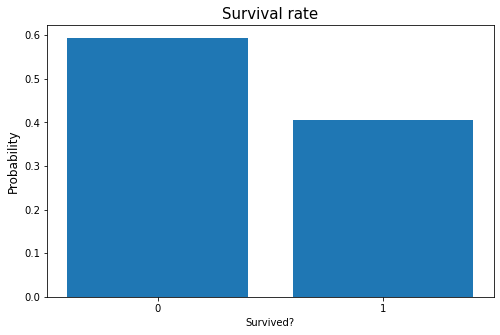

In [18]:
df["Survived"] = df["Survived"].astype(str)     ## convert the variable to a string so that it is treated categorical
data = df["Survived"].value_counts(normalize=True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.bar(xs, ys)
plt.title("Survival rate", fontsize=15)
plt.xlabel("Survived?")
plt.ylabel("Probability", fontsize=12)
plt.show()

**b)** Let's turn into some other attributes and explore further.  According to the data dictionary, `PassengerId` is an identifier, hence it should be unique.  Can you confirm it?

In [19]:
unique_count = df.PassengerId.nunique()
n_rows, n_cols = df.shape
print(f"# unique PassengerId : {unique_count}")
print(f"# rows : {n_rows}")

# unique PassengerId : 714
# rows : 714


Indeed the number of unique values is the same as number of rows, implying that each observation is assigned a different `PassenterID`

**c)** From the `Pclass` feature, how many classes are there?  What is the count for each class?

In [20]:
classes = df.Pclass.unique()
print(f"Values of classes : {classes}")

Values of classes : ['Third' 'First' 'Second']


In [21]:
data = df["Pclass"].value_counts()
type(data)

pandas.core.series.Series

Here we see that there are three classes: 3,1,2. To further count the frequency of each class, we can similarly plot a bar plot.

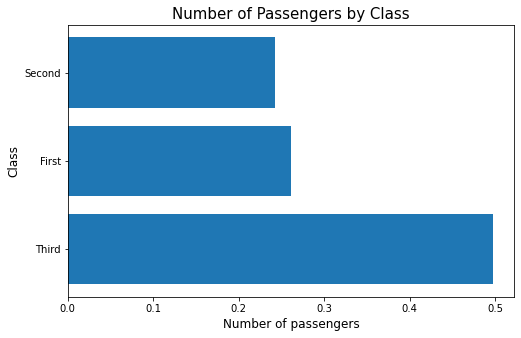

In [22]:
df["Pclass"] = df["Pclass"].astype(str)     ## convert the variable to a string so that it is treated categorical
data = df["Pclass"].value_counts(normalize=True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.barh(xs, ys)
plt.title("Number of Passengers by Class", fontsize=15)
plt.xlabel("Number of passengers", fontsize=12)
plt.ylabel("Class", fontsize=12)
plt.show()

**d)** Lets briefly look at some descriptive measures for the numerical variables `Age`. In the lecture, we have covered _mean_ as a measure of central tendency; _variance_ or _standard deviation_ as a measure of dispersion. There are other descriptive measures, such as _mode_, _median_, and _percentiles_. As discussed earlier, mode is the most frequent value; median is basically the value in the "middle" if you sort the values. So for example for the numbers [1,1,3,4,100], their mode is 1 and median is 3, but the mean is 21.8.   

(i) What is the mean, median, variance for `Age`?

In [23]:
print(f"Mean : {df.Age.mean()}")
print(f"Median : {df.Age.median()}")
print(f"Variance : {df.Age.var()}")

Mean : 29.69911764705882
Median : 28.0
Variance : 211.0191247463081


We can also use the `describe` method to give us a summary of key statistics.  Here `pandas` reports the quantile values for the variable.  Specifically, the first quantile (also the $25^{th}$-percentile) is the value which is higher than one quarter of the values.  The second quantile (also the $50^{th}$-percentile) is the median.  The third quantile (also the $75^{th}$-percentile) is the value which is higher than three quarters of the values.  These quantiles give a first indication of the distribution.  For example if median and $75^{th}$-percentile are close, that means the values are skewed 

In [24]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(ii)  How old was the oldest survivor?  How old was the youngest who did not survive?

In [25]:
oldest = df[df.Survived=="1"].Age.max()
youngest = df[df.Survived=="0"].Age.min()

print(f"Oldest survivor's age : {oldest}")
print(f"Youngest non-survivor's age : {youngest}")

Oldest survivor's age : 80.0
Youngest non-survivor's age : 1.0


### 3.2 Bi-variate analysis

**e)** So far we have been dealing with univariate analysis, i.e., we have been dealing with one variable at a time.  Let's answer some questions relating two variables.  What is the number of males who survived and did not?  What about females?

In [26]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,64,197
male,360,93


Here we have constructed a two-way contigency table (also known as a cross tablulation) using `crosstab`, which groups the data along the two dimensions and count the elements.  Note that this is applicable only for cases where the two dimensions are categorical.

**f)** Is survival independent of sex? We can compute the probability of survival, and compare it with by conditioning on the sex.

In [27]:
table = pd.crosstab(df.Sex, df.Survived)

passengers = table["0"]["female"] + table["0"]["male"] + table["1"]["female"] + table["1"]["male"]
survived = table["1"]["female"] + table["1"]["male"] 
males = table["0"]["male"] + table["1"]["male"]
females = table["0"]["female"] + table["1"]["female"]

prob_1 = survived / passengers
prob_1_given_male = table["1"]["male"] / males
prob_1_given_female = table["1"]["female"] / females

print(f"P(Survived=1) : {prob_1}")
print(f"P(Survived=1|Sex=Male) : {prob_1_given_male}")
print(f"P(Survived=1|Sex=Female) : {prob_1_given_female}")

P(Survived=1) : 0.4061624649859944
P(Survived=1|Sex=Male) : 0.2052980132450331
P(Survived=1|Sex=Female) : 0.7547892720306514


Probability of survival given male (or female) is quite different from the unconditional probability of survival, hence survival is not independent of sex

**g)** From part (e) we see that there are more female survivor (195) than male survivor (93).  Can we conclude that female is more likely to survive than male? 

No. More precisely, we can't draw a conclusion from the absolute number. Consider the hypothetical case where there are only 93 males onboard, and 1950 females onboard. Then in fact male survival rate would have been 100% whereas female survival rate would have been 10%. 

To answer the question "is female more likely to survive than male", we have to check if the following holds:<br>
```
P(Survived = 1 | Sex = Female) > P(Survived = 1 | Sex = Male)?
```
From part (f), we can see that it is true. 

However, we can also use visual aids to help us establish the above conclusion, without explicitly computing the conditional probabilities. 

In [28]:
norm_table = pd.crosstab(df.Sex, df.Survived, normalize="index")
norm_table

Survived,0,1
Sex,,
female,0.245211,0.754789
male,0.794702,0.205298


What we have done is to first **normalize** the cross tab we created earlier along the *index* dimension. This ensures that numbers sum up to 1 along the columns.  Once done, we simply create a **stacked chart** using `plot` method for a `DataFrame`

<AxesSubplot:xlabel='Sex'>

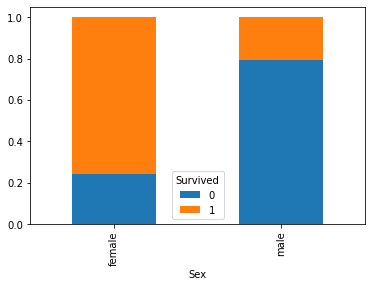

In [29]:
norm_table.plot.bar(stacked=True)

Finally, it is also possible to put the two variables in the same plot using a *mosaic plot*---think of it as a visualization of the contigency table.  To do that however you have to import the `statsmodels` package.

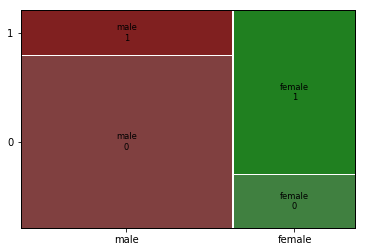

In [30]:
from statsmodels.graphics.mosaicplot import mosaic
_ = mosaic(df, ['Sex','Survived'])

<a id="section_b"></a>
# Section B: Numerical Variables

>#### Table of Contents
>
>- [Introduction](#b_intro)
>- [Univariate analysis](#b_univar)
>    - Five-number summary
>    - Boxplot
>    - Histogram
>- [Bivariate analysis](#b_bivar)
>    - Scatter plot
>    - Correlation
>    - Grouped boxplot
>- [Data transformation](#b_transform)
>    - Feature engineering
>    - Log-transformation

<a id="b_intro"></a>
## 1 Introduction

In this section we continue with Exploratory Data Analysis (EDA).  While we focused more on categorical variables in Section A, here we mostly deal with numerical variables.  We will anchor on the `framingham` dataset and discuss univariate and multivariate EDA applicable for the case of numerical variables, and briefly touch on data transformation.  Please download `framingham.csv` and place it in the same directory as this Jupyter Notebook.

The Framingham Heart Study is a long term ongoing study to understand the risk factors concerning cardio vascular heart diseases.  The study started in 1948 with adult residents from Framingham, Massachusetts.  Much of the now-common knowledge concerning heart disease, such as the effects of diet and exercise, is in fact based on this study.

More specificically, the study profiles the participants with respect to his or her health and medical conditions and lifestyle at the time of examination.  It also records the risk of his or her getting coronary heart disease (CHD) in ten years time.  Hence using this dataset it is possible to analyse possible risk factors leading to CHD in ten years.

Here is a brief description of the variables

|Column name|<p align="left"> Explanation|Data type|
|:---:|:---:|:---:
|male|<p align="left"> gender of particiapant | boolean (0=female, 1=male ) |
|age| <p align="left"> age at exam time | integer |
|education| <p align="left"> education level | float (1=some high school; 2=high school/GED; 3=some college/vocational school; 4=college) |
|currentSmoker|<p align="left"> whether or not a smoker | boolean (0=no,1=yes) |
|cigsPerDay| <p align="left"> number of cigarettes smoked per day (estimated average) | float |
|BPMeds| <p align="left"> whether or not on BP medications | boolean (0=no, 1=yes) |
|prevalentStroke| <p align="left"> whether or not had stroke | boolean (0=no, 1=yes) |
|prevalentHyp| <p align="left"> whether or not had hypertension | boolean (0=no, 1=yes)|
|diabetes| <p align="left"> whether or not had diabetes | boolean (0=no, 1=yes) |
|totChol| <p align="left"> cholestrol level in mg/dL | float | 
|sysBP| <p align="left"> systolic blood pressure in mmHg | float |
|diaBP| <p align="left"> diastolic blood pressure in mmHg | float |
|BMI| <p align="left"> Body Mass Index calculated as: Weight/Height$^2$ (kg/m$^2$) | float |
|glucose| <p align="left"> glucose level in mg/dL | float |
|TenYearCHD| <p align="left"> 10-year risk of coronary heart disease | boolean (0=no, 1=yes) |    

Let's import the commonly used libraries and load the dataset `framingham.csv` into a `DataFrame`

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('framingham.csv')

Take a quick peek by sampling randomly a few rows of data

In [32]:
df.sample(10, random_state=42)    
# random_state specifies the "seed" of the random sampling
# fix the seed for reproducibility

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1350,0,49,3.0,1,10.0,0.0,0,0,0,260.0,123.0,80.0,23.10,63.0,65.0,1
1434,1,43,1.0,1,25.0,0.0,0,0,0,201.0,121.0,82.0,23.84,70.0,91.0,0
2500,1,45,1.0,1,1.0,0.0,0,1,0,277.0,140.0,84.0,28.74,69.0,74.0,0
1128,0,63,3.0,1,10.0,0.0,0,1,0,236.0,189.0,103.0,27.91,60.0,74.0,0
4144,1,59,2.0,0,0.0,0.0,0,0,0,237.0,131.5,84.0,24.17,90.0,94.0,1
3883,0,58,2.0,0,0.0,0.0,0,1,0,345.0,188.0,102.0,28.89,95.0,NaN,0
3624,0,38,3.0,1,25.0,0.0,0,0,0,205.0,117.5,77.0,21.44,100.0,NaN,0
794,1,42,2.0,0,0.0,0.0,0,0,0,228.0,130.0,92.0,24.86,85.0,76.0,0
298,1,41,2.0,0,0.0,0.0,0,0,0,173.0,130.0,80.0,28.39,65.0,61.0,0
184,1,67,NaN,0,0.0,0.0,0,0,0,257.0,125.0,67.5,25.95,65.0,69.0,0


Already now it gives us a first indication that some preprocessing need to be done.  For example, `glucose` column has misisng data, `education` column seems to in float - which does not make sense.

How big is the dataset we are dealing with?

In [33]:
n_rows, n_cols = df.shape
print(f"# rows = {n_rows}")
print(f"# columns = {n_cols}")

# rows = 4240
# columns = 16


And how much missing data is there?

In [34]:
df.count() / n_rows

male               1.000000
age                1.000000
education          0.975236
currentSmoker      1.000000
cigsPerDay         0.993160
BPMeds             0.987500
prevalentStroke    1.000000
prevalentHyp       1.000000
diabetes           1.000000
totChol            0.988208
sysBP              1.000000
diaBP              1.000000
BMI                0.995519
heartRate          0.999764
glucose            0.908491
TenYearCHD         1.000000
dtype: float64

There is only a small percentage of missing data, so lets drop them

In [35]:
df.dropna(inplace=True)
df.shape

(3658, 16)

Earlier we noted that some features have incorrect data type.  Let's take a closer look

In [36]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Looking at the data dictionary we see that `education` and `BPMeds` are in fact categorical features.  They can't be `float` but we could use `int` to represent them.  To do that we cast them to `int`.

In [37]:
df.education = df.education.astype(int)
df.BPMeds = df.BPMeds.astype(int)

df.dtypes

male                 int64
age                  int64
education            int32
currentSmoker        int64
cigsPerDay         float64
BPMeds               int32
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

<a id="b_univar"></a>
## 2 Univariate analysis

In the following, we will explore common ways to summarize and visualize numerical variables individually.

### 2.1 Five-number summary

We now have a clean dataset for further analysis. The numerical features we have are `age`, `totChol`, `sysBP`, `dialBP`, `BMI`, `heartRate`, `glucose`.  Let's take a look at the *five-number summary* statistics using `.describe`.

-----
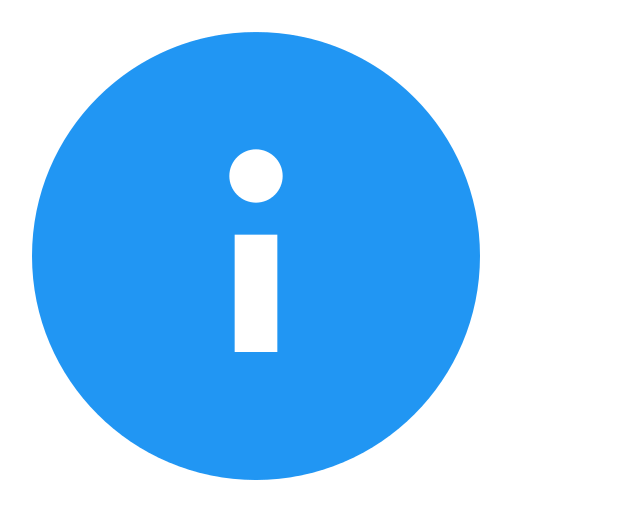A five-number summary consists of five descriptive measures, namely, the minimum, maximum, and the 25th/50th/75th percentiles. The $x$th percentile refers to the value such that $x$% of the observations are found to be smaller. The 25th and 75th percentiles are respectively known as the *lower and upper quantiles*, or _first and third quantiles_. The 50th percentile is also known as the _median_ or the _second quantile_. 

-----

In [38]:
df[ ["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"] ].describe()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,49.551941,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925
std,8.562029,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164
min,32.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000
50%,49.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000
max,70.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


### 2.2 Boxplot

Instead of presenting in a table format, the five-number summary is also commonly visualized in the form of a **boxplot**. 
A boxplot also indicates outliers, which is typically defined as values larger than (upper quartile + 1.5 $\times$ IQR) or values smaller than (lower quartile - 1.5 $\times$ IQR). Here IQR is the Inter-Quantile Range and is defined as  (upper quartile $-$ lower quartile).

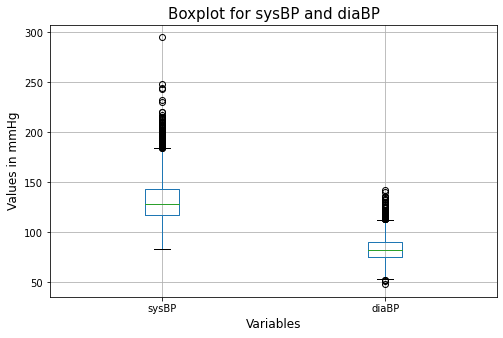

In [39]:
plt.figure(figsize=(8,5))
df[["sysBP","diaBP"]].boxplot()
plt.title("Boxplot for sysBP and diaBP", fontsize=15)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Values in mmHg", fontsize=12)
plt.show()

We could also display boxplots across all numerical variables. What conclusions can you draw from these boxplots?

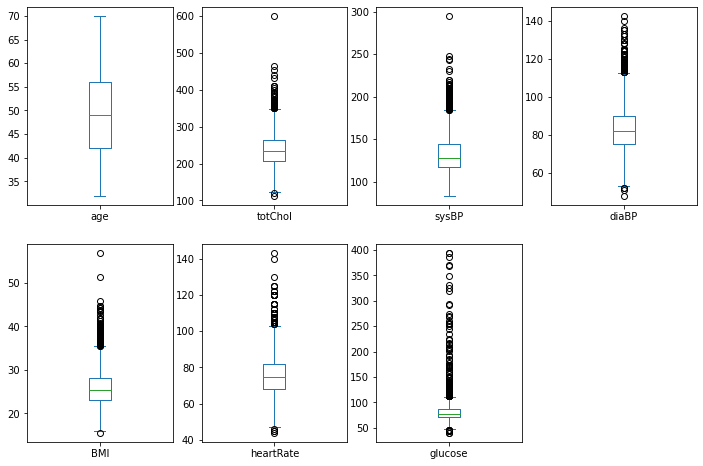

In [40]:
df_numerics = df[["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(12, 8))
plt.show()

### 2.3 Histogram

A **histogram** is a frequency plot for *numerical* variables.  It shows how the values for a given variable are distributed across different bins.  This allows us to visually check if the data follows a certain distribution, such as geometric, uniform, normal, etc.  

Take `age` as our example, where it takes the values from 32 to 70 (see table).  To construct a histogram, we decide on the number of bins (or intervals) between the min and max, and then count the number of observations that fall into each bin.  Note that in the previous lab we have use *barplot* which is the counterpart of *histogram* for categorical variables. 

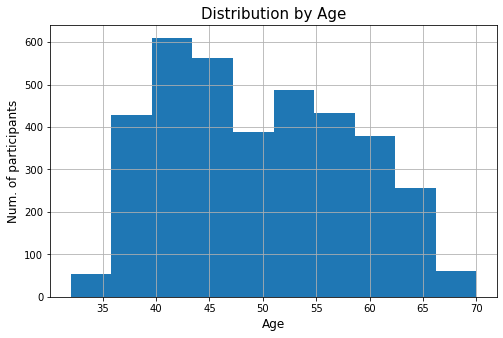

In [41]:
plt.figure(figsize=(8,5))
plt.title("Distribution by Age", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Num. of participants", fontsize=12)
df["age"].hist(bins=10)    # if `bins` is not set, default will be applied
plt.show()

`pandas` also conveniently allows us to plot historgram for the entire dataframe. What conclusions can you draw from these histograms?

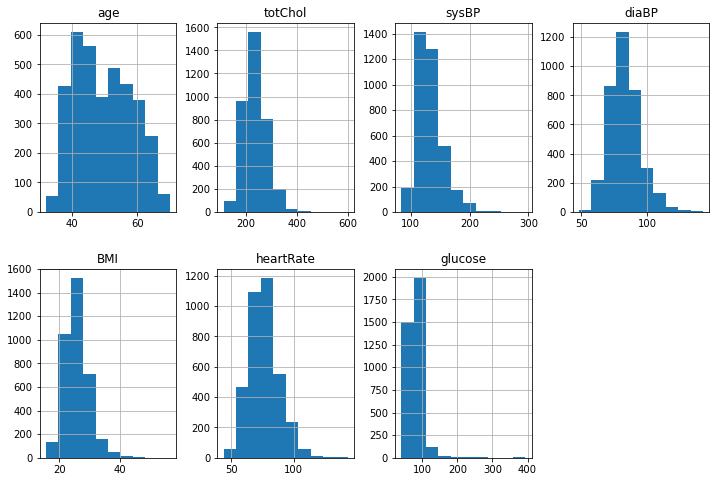

In [42]:
df_numerics.hist(layout=(2, 4), figsize=(12, 8))
plt.show()

<a id="b_bivar"></a>
## 3 Bivariate analysis

Next, we explore the relationships between two variables, and this is known as bivariate analysis.

### 3.1 Scatter plot

A **scatter plot** is used when we want to visualize the relationships between two variables. The values of one variable are plotted on the horizontal axis and the corresponding values of the other varaible are plotted in the vertical axis.

The variables `sysBP` and `diaBP` are both measuring blood pressure and so we expect them to have linear relationship.  This can be confirmed visually with the following scatter plot.

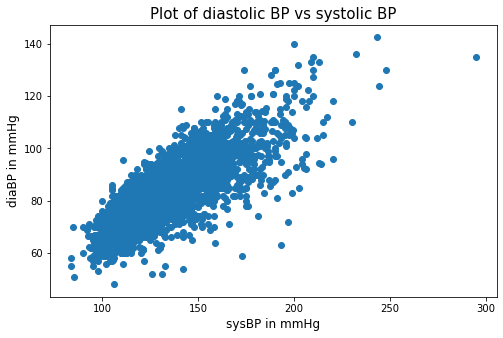

In [43]:
xs = df.sysBP
ys = df.diaBP

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of diastolic BP vs systolic BP", fontsize=15)
plt.xlabel("sysBP in mmHg", fontsize=12)
plt.ylabel("diaBP in mmHg", fontsize=12)
plt.show()

To quantify their relationship, we calculate the correlation coefficient ($\rho$) between the two variables.  We could use `corrcoef`, which gives us the correlation coefficients matrix.  The diagonal elements are 1 because the correlation coefficient between a variable and itself is one.  The off-diagonal elements are the correlation coefficients between the two variables.

In [44]:
corr = np.corrcoef(xs, ys)
corr

array([[1.        , 0.78666936],
       [0.78666936, 1.        ]])

We could use `cov` to get the covariance between the variables.  The diagonal elements are the covariance between a variable and itself (basically its variance).  Off-diagonal elements are covariance between one and another variable. Note that both covariance and correlation coefficient are symmetric, i.e., Cov$(X,Y)=$Cov$(Y,X)$, and Cor$(X,Y)=$Cor$(Y,X)$.

In [45]:
cov = np.cov(xs, ys)
cov

array([[487.82963059, 208.05344935],
       [208.05344935, 143.38284631]])

In [46]:
xs.var(), ys.var() 

(487.8296305885506, 143.3828463107594)

To incorporate data beyond two dimensions, one approach is to assign a color to the third dimension for each pair of values in the scatter plot.  Below you see how the `sysBP` and `diaBP` are jointly distributed for each of the groups--those who got CHD and those who did not. What can you infer from this plot?

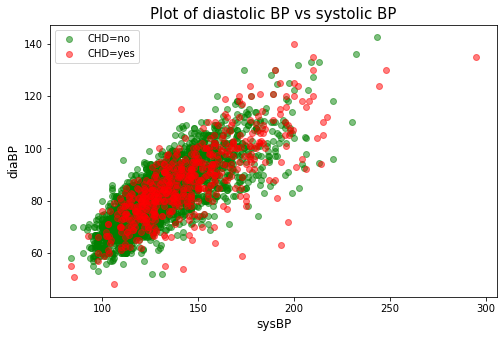

In [47]:
plt.figure(figsize=(8,5))
plt.scatter(df[df.TenYearCHD==0].sysBP, df[df.TenYearCHD==0].diaBP, c='green', label='CHD=no', alpha=0.5)
plt.scatter(df[df.TenYearCHD==1].sysBP, df[df.TenYearCHD==1].diaBP, c='red', label='CHD=yes', alpha=0.5)
plt.xlabel("sysBP", fontsize=12)
plt.ylabel("diaBP", fontsize=12)
plt.title("Plot of diastolic BP vs systolic BP", fontsize=15)
plt.legend()
plt.show()

### 3.2 Grouped boxplot

We could also group by a feature and visualize the box plot by that.  For example, below we see how the `BMI` is distributed for females and males.  While the median looks about the same (by visual inspection), it seems at first glance the mean and variance of `BMI` is different for males and females.  We will answer these questions rigourously in a future session.

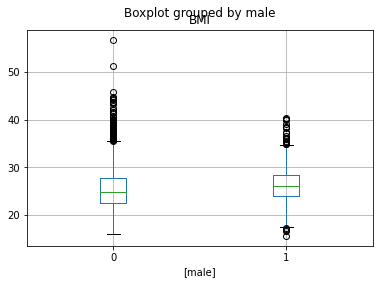

In [48]:
df[['BMI','male']].boxplot(by='male')
plt.show()

In [49]:
df[['BMI','male']]

,BMI,male
0,26.97,1
1,28.73,0
2,25.34,1
3,28.58,0
4,23.10,0
...,...,...
4233,25.97,1
4234,19.71,1
4237,21.47,0
4238,25.60,1


<a id="b_transform"></a>
### 4 Data Transformation

Often times we need to transform some of the variables in order to reveal useful observations. One common strategy is to derive a new variable based on one or more existing variables (called *feature creation*), and the other is to apply a function on an existing variable. 

### 4.1 Feature creation

Suppose we want to investigate if smoking is a risk related to CHD, then what we need to do is to first categorize each person as a `HeavySmoker`, `Smoker` and `NonSmoker`, and calculate the rate of `TenYearCHD` for each of the three categories. In other words we need to derive a new feature out of exisiting ones. Below we use the number of cigrattes smoked per day to identify `HeavySmoker`. Amongst those who smoke, if a person smokes more than twice the average, we consider him/her a `HeavySmoker`.

In [50]:
ave = df[df.currentSmoker==1].cigsPerDay.mean()

def smoker_class(n):
    if n > ave * 2:
        return "HeavySmoker"
    elif n > 0:
        return "Smoker"
    else:
        return "NonSmoker"

We then create a new feature (i.e. variable) named `smokerClass` using `.apply`, and subsequently create a crosstab to visualize the rates of `TenYearCHD` across different `smokerClass`. What observations do you make?

In [51]:
df["smokerClass"] = df.cigsPerDay.apply(smoker_class)

pd.crosstab(df.smokerClass, df.TenYearCHD, normalize="index")

TenYearCHD,0,1
smokerClass,,
HeavySmoker,0.764706,0.235294
NonSmoker,0.854468,0.145532
Smoker,0.846945,0.153055


### 4.2  Log-transformation

Many real-world physical quantities are heavy right-tailed, i.e. many values are skewed to the right. Hence a common technique is to *log-transform* the data. Below we see that `glucose` is right-tailed, and after taking its logorithm, it looks approximately like a normal distribution.  While in general there is no guarantee log-transformation results in normal distribution, the technique is useful in positive-only quantities, such as the glucose level here, since the logarithm can only be applied to positive values.

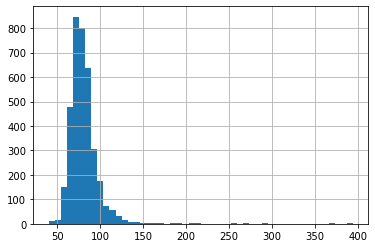

In [52]:
df.glucose.hist(bins=50)
plt.show()

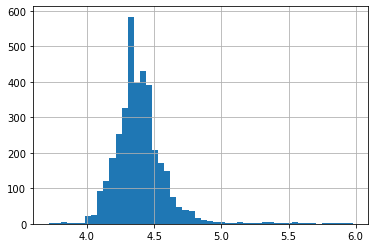

In [53]:
log_glucose = np.log1p(df.glucose)
log_glucose.hist(bins=50)
plt.show()

Note that in the above, we actually applied `log1p(x)`, which is defined as $\log(x+1)$. This is to prevent values smaller than one from resulting in negative values after log-transformation, e.g. $\log(0.5)=-0.693$, which would become difficult to interpret. `log1p` is also useful for non-negative quantities, most notably the frequency of occurrences or counts, such as the `cigsPerDay` variable here. 

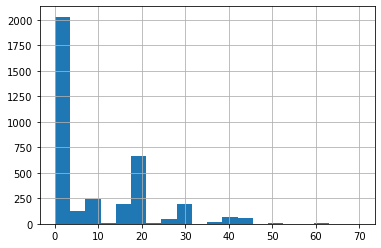

In [54]:
df.cigsPerDay.hist(bins=20)
plt.show()

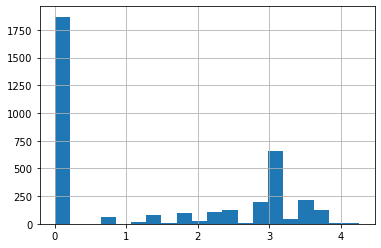

In [55]:
log_cigsPerDay = np.log1p(df.cigsPerDay)
log_cigsPerDay.hist(bins=20)
plt.show()

-----
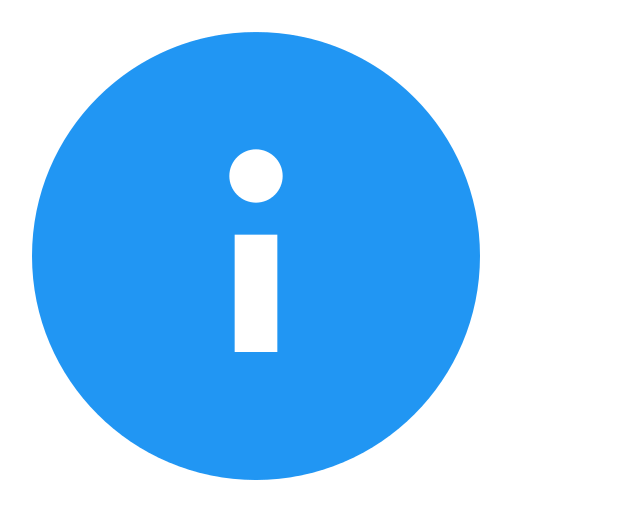 Note that for a zero value, after `log1p` transformation we still get zero, i.e., $\log(0+1)=0$. For a positive value, after `log1p` transformation we still get a positive value, i.e., $\log(x+1)>0$ if $x>0$. For instance, $\log(0.1+1)=0.0953$.

-----